In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Read & Explore The Data

In [2]:
data=sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Describing The Data

In [3]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data=sns.load_dataset('titanic')
data.drop(['who','adult_male','deck','alive','alone','embark_town','class'],axis=1,inplace=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
data['sex']=data['sex'].map({'male':0,'female':1})

In [6]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [7]:
data['embarked']=data['embarked'].map({'S':3,'C':1,'Q':2})

In [8]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,0,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3.0
887,1,1,1,19.0,0,0,30.0000,3.0
888,0,3,1,NaN,1,2,23.4500,3.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [9]:
data['embarked']=data['embarked'].astype('Int64')

In [10]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,NaN,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    Int64  
dtypes: Int64(1), float64(2), int64(5)
memory usage: 56.7 KB


In [12]:
data['fare']=data["fare"].fillna(data['fare'].dropna().median())
data['age']=data['age'].fillna(data['age'].dropna().median())

In [13]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,28.0,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [14]:

data.fillna(method='bfill',inplace=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,28.0,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [15]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    Int64  
dtypes: Int64(1), float64(2), int64(5)
memory usage: 56.7 KB


In [17]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,28.0,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


# Separating Features and Labels

In [18]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0:1].values
print (X.shape, y.shape)

(891, 7) (891, 1)


# Splitting into Train and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print (X_train.shape, y_train.shape)

(623, 7) (623, 1)


# Classification and Accuracy

## Logistic Regression

Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel()) 
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(y_pred_log_reg, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

79.48 %


C:\Users\Vibhanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
print (y_train.shape)

(623, 1)


In [22]:
print (y_train.ravel().shape)

(623,)


## Gaussian Naive Bayes

Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train.ravel())
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
print (str(acc_gnb) + '%')


78.73%


## Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.ravel())
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(y_pred_decision_tree, y_test) * 100, 2)
print (str(acc_decision_tree) + '%')

76.87%


In [25]:
# creating object of decision tree model with gain information criterion
clf = DecisionTreeClassifier(criterion = 'gini', random_state=0,max_depth=3, min_samples_leaf=5)
# fit operation
clf.fit(X_train, y_train.ravel())
# prediction operation
y_pred_dt = clf.predict(X_test)
# claculating accuracy
acc_dt = round(accuracy_score(y_pred_dt, y_test)*100, 2)
print ('Accuracy by Decision tree classifier Model with entropy criterion is: '+ str(acc_dt)+' percent')

Accuracy by Decision tree classifier Model with entropy criterion is: 82.46 percent


## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train.ravel())
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(accuracy_score(y_pred_random_forest, y_test) * 100, 2)
print (str(acc_random_forest) + '%')

82.46%


In [27]:
# Comparing Accuracy Value Of Decision Tree And Random Forest Algorithm
if acc_decision_tree > acc_random_forest:
    z = acc_decision_tree - acc_random_forest
    print( 'Decision Tree Classifier gives more accurate result with accuracy of %s percent' % acc_decision_tree)
    print( '\nBy the accuracy difference of %s' %z)
elif acc_decision_tree < acc_random_forest:
    z = acc_random_forest - acc_decision_tree
    print( 'Random Forest Classifier gives more accurate result with accuracy of %s percent' % acc_random_forest)
    print( '\nBy the accuracy difference of %s' %z)
else:
    print( 'Decision Tree Classifier and Random Forest Classifier gives same accuracy of %s percent' % m)

Random Forest Classifier gives more accurate result with accuracy of 82.46 percent

By the accuracy difference of 5.589999999999989


# Comparing Models

In [28]:
# dictionary to plot bar graph
classifiers = {'Logistic Regression':acc_log_reg,
              'Gaussian Naive Bayes':acc_gnb,
              'Decision Tree':acc_decision_tree,
              'Random Forest':acc_random_forest}

In [29]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
              'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg,  acc_decision_tree, 
              acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,82.46
0,Logistic Regression,79.48
3,Naive Bayes,78.73
1,Decision Tree,76.87


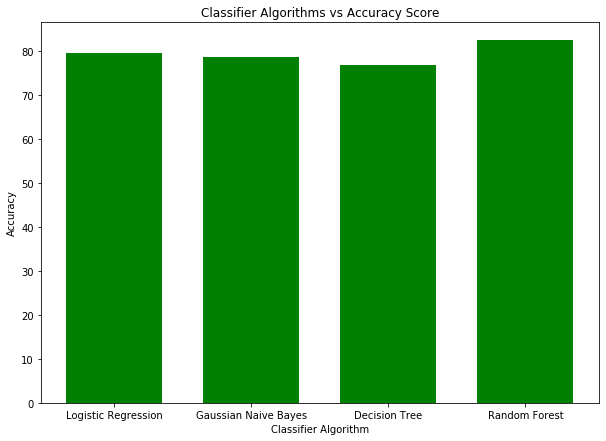

In [30]:
# plot bar graph for differnt classification algorithms and their accuracy score
# set the layout of graph frame
plt.figure(figsize=(10, 7))
# set layout of bars
plt.bar(range(len(classifiers)), classifiers.values(),align='center', width=0.7, color = 'g')
# set labels at x axis
plt.xticks(range(len(classifiers)), classifiers.keys())
# gives name to x axis
plt.xlabel('Classifier Algorithm')
# gives name to y axis
plt.ylabel('Accuracy')
# gives title to the graph
plt.title('Classifier Algorithms vs Accuracy Score')
# prints the graph
plt.show()

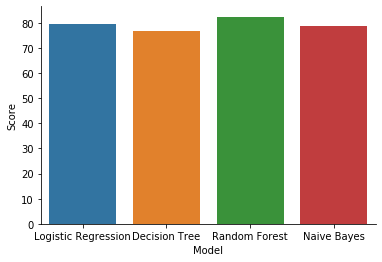

In [31]:
# Bar Graph for models and accuracy score
p = sns.barplot(x='Model',y='Score',data = models)
sns.despine()